In [17]:
import librosa 
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np


In [18]:
#load the data
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

#load the file using librosa
#  the sample file, sample rate(sr) 
# = librosa.load(file, sr= 22500 defauly, mono - True )
debussy, _ = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [19]:
# extract RMSE with librosa
FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_debussy = librosa.feature.rms(debussy,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(redhot,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)[0]

rms_duke = librosa.feature.rms(duke,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)[0]

d:\python 3.6\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Pass y=[-0.01742554 -0.03567505 -0.04995728 ...  0.00912476  0.00866699
  0.00964355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys
d:\python 3.6\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Pass y=[0.08999634 0.14868164 0.17251587 ... 0.09646606 0.11129761 0.06411743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.
d:\python 3.6\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Pass y=[-0.03326416 -0.00845337  0.00415039 ...  0.11965942  0.10794067
  0.08566284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


In [20]:
#plot the rms for all values
rms_debussy.shape

(1292,)

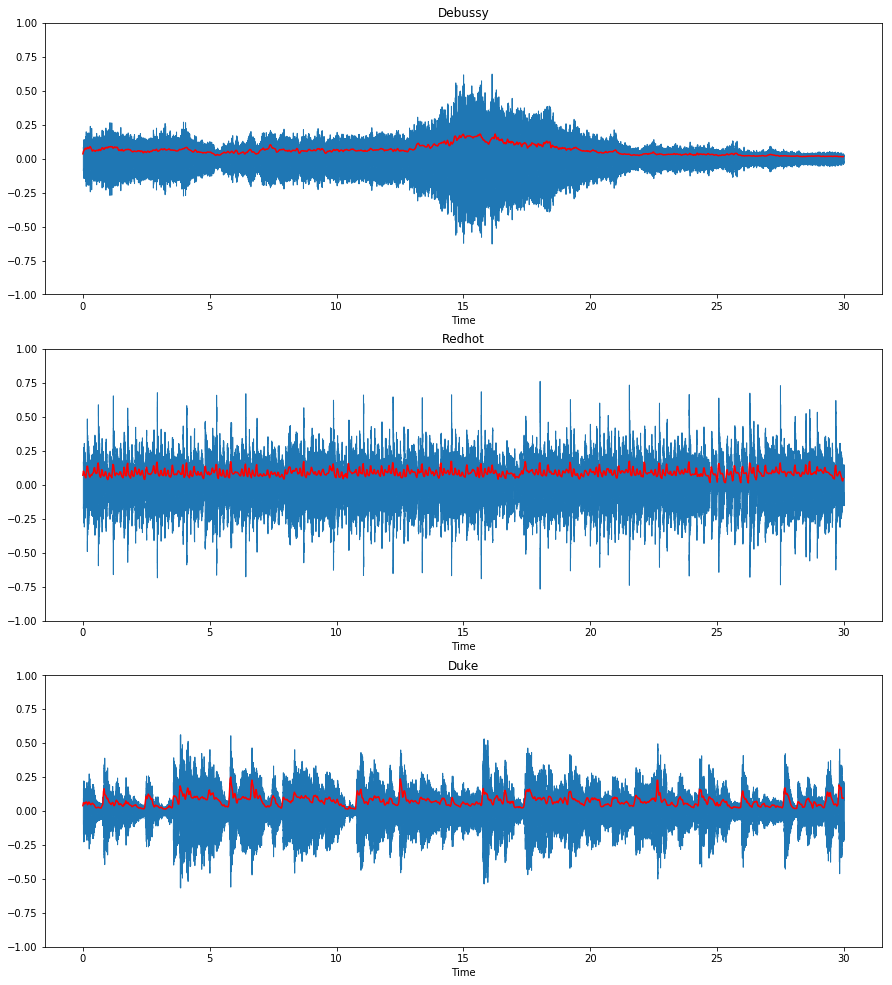

In [21]:
#visual AE for all files
#visualize Waveform

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))

plt.subplot(3, 1, 1) # rows, columns, index
librosa.display.waveshow(debussy)
plt.title("Debussy")
plt.plot(t, rms_debussy, color = "r")
plt.ylim((-1 , 1))

plt.subplot(3, 1, 2) # rows, columns, index
librosa.display.waveshow(redhot)
plt.plot(t, rms_redhot, color = "r")

plt.title("Redhot")
plt.ylim((-1 , 1))

plt.subplot(3, 1, 3 ) # rows, columns, index
librosa.display.waveshow(duke)
plt.plot(t, rms_duke, color = "r")
plt.title("Duke")
plt.ylim((-1 , 1))

plt.show()

In [22]:
#create RMS function
def rms(signal, frame_length, hop_length) :
  rms = [] 

  for i in range (0 , len(signal), hop_length) :
    rms_current_frame = np.sum(signal[i: i+ frame_length] ** 2)
    rms_current_frame /= frame_length 
    rms_current_frame = np.sqrt(rms_current_frame)
    rms.append(rms_current_frame)
  
  return np.array(rms)
  

In [23]:
# extract RMSE with librosa
FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_debussy2 = rms(debussy,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)
rms_redhot2 = rms(redhot,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)

rms_duke2 =rms(duke,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)

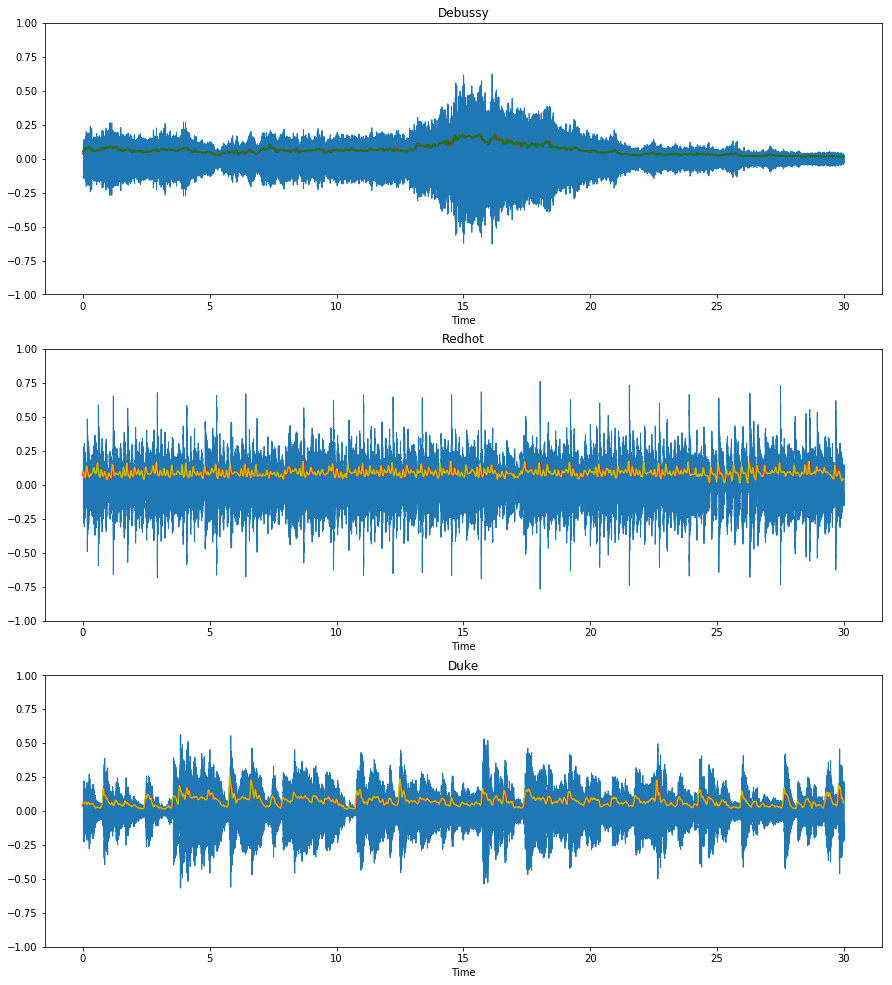

In [24]:
#visual AE for all files
#visualize RMS

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))

plt.subplot(3, 1, 1) # rows, columns, index
librosa.display.waveshow(debussy)
plt.title("Debussy")
plt.plot(t, rms_debussy, color = "r")
plt.plot(t, rms_debussy2, color = "g")

plt.ylim((-1 , 1))

plt.subplot(3, 1, 2) # rows, columns, index
librosa.display.waveshow(redhot)
plt.plot(t, rms_redhot, color = "r")
plt.plot(t, rms_redhot2, color = "y")

plt.title("Redhot")
plt.ylim((-1 , 1))

plt.subplot(3, 1, 3 ) # rows, columns, index
librosa.display.waveshow(duke)
plt.plot(t, rms_duke, color = "r")
plt.plot(t, rms_duke2, color = "y")

plt.title("Duke")
plt.ylim((-1 , 1))

plt.show()

In [25]:
#finding zero crossing rate
# extract RMSE with librosa
FRAME_LENGTH = 1024
HOP_LENGTH = 512

zcr_debussy = librosa.feature.zero_crossing_rate(debussy,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)[0]

zcr_duke = librosa.feature.zero_crossing_rate(duke,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)[0]

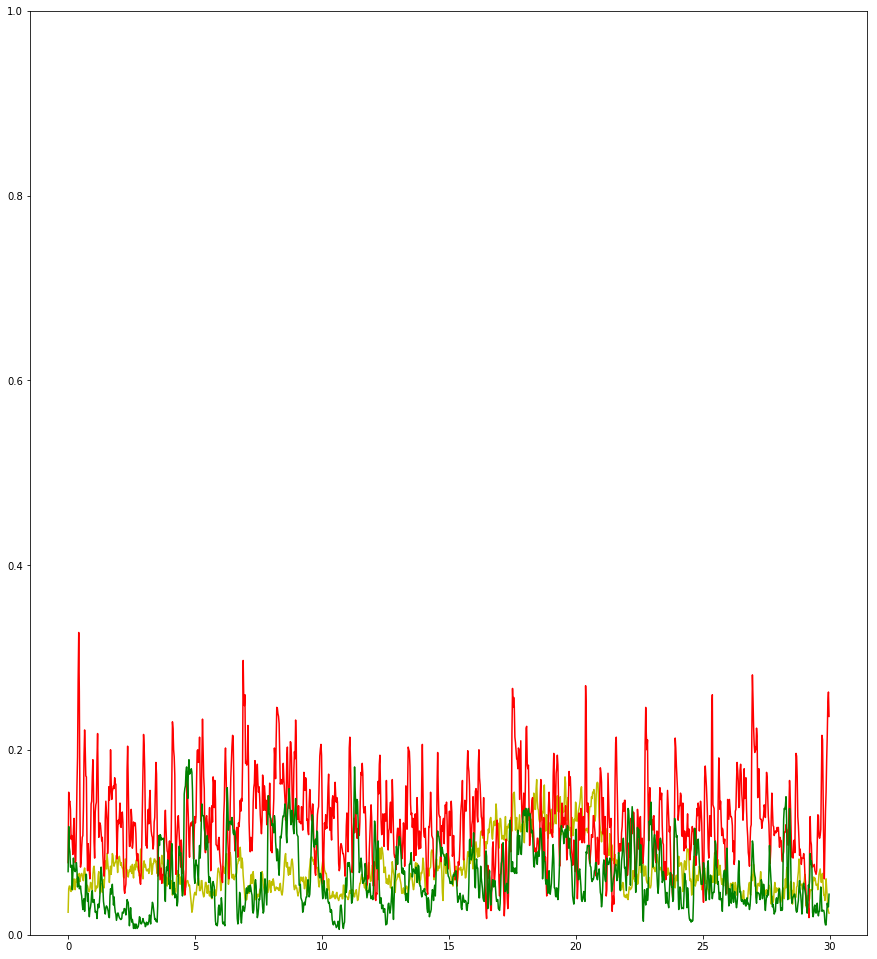

In [26]:
#visualize ZCR
#visual AE for all files
#visualize Waveform

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))


plt.plot(t, zcr_debussy, color = "y")
plt.plot(t, zcr_redhot, color = "r")
plt.plot(t, zcr_duke, color = "g")
plt.ylim((0 , 1))



plt.show()

In [27]:
voice_file = "audio/voice.wav"
noise_file = "audio/noise.wav"

In [28]:
voice, _ = librosa.load(voice_file, duration=15)
noise, _ = librosa.load(noise_file, duration=15)

In [29]:
ipd.Audio(voice_file)

In [34]:
#finding zero crossing rate
# extract RMSE with librosa
FRAME_LENGTH = 1024
HOP_LENGTH = 512

zcr_voice = librosa.feature.zero_crossing_rate(voice,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(noise,
                                  frame_length=FRAME_LENGTH,
                                  hop_length=HOP_LENGTH)[0]

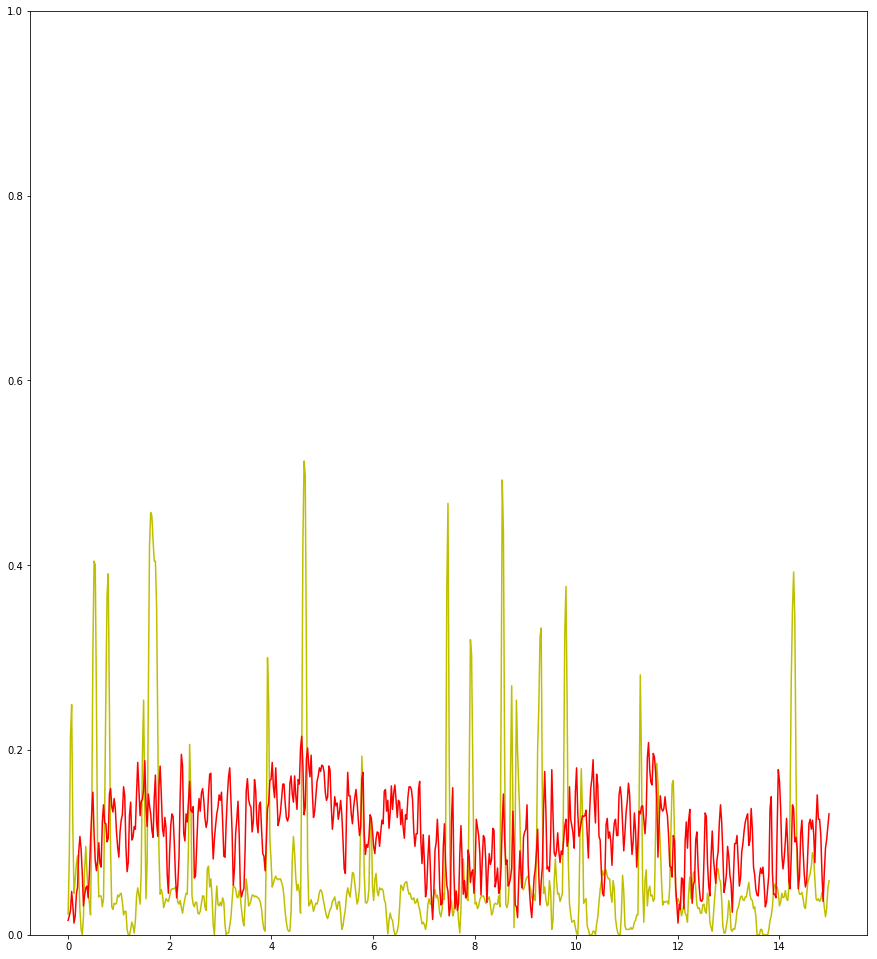

In [35]:


frames = range(0, len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))


plt.plot(t, zcr_voice, color = "y")
plt.plot(t, zcr_noise, color = "r")
plt.ylim((0 , 1))



plt.show()